In [202]:
import quandl
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
import matplotlib.pyplot as plt
import math

In [203]:
df = quandl.get('WIKI/GOOGL')

In [204]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [205]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [206]:
df['HL_%'] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Low'] * 100
df['%_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100

In [207]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_%,%_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.441017,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,8.537313,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.062357,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.753210,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.966115,1.183658


In [208]:
df = df[['Adj. Open','HL_%','%_change','Adj. Volume']]
df.head()

,Adj. Open,HL_%,%_change,Adj. Volume
Date,,,,
2004-08-19,50.159839,8.441017,0.324968,44659000.0
2004-08-20,50.661387,8.537313,7.227007,22834300.0
2004-08-23,55.551482,4.062357,-1.227880,18256100.0
2004-08-24,55.792225,7.753210,-5.726357,15247300.0
2004-08-25,52.542193,3.966115,1.183658,9188600.0


In [209]:
df.describe()

,Adj. Open,HL_%,%_change,Adj. Volume
count,3402.000000,3402.000000,3402.000000,3.402000e+03
mean,404.684669,2.152784,-0.021357,7.854607e+06
std,252.390137,1.452904,1.501265,8.262469e+06
min,49.698414,0.382151,-9.179757,5.211410e+05
25%,230.830050,1.248970,-0.739721,2.458321e+06
50%,299.228690,1.767554,-0.016254,5.111800e+06
75%,559.229069,2.555175,0.752481,1.030208e+07
max,1188.000000,17.438185,8.759770,8.215110e+07


In [210]:
df['label'] = df['Adj. Open'].shift(-5)
df.head(10)

,Adj. Open,HL_%,%_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.159839,8.441017,0.324968,44659000.0,52.637487
2004-08-20,50.661387,8.537313,7.227007,22834300.0,54.217364
2004-08-23,55.551482,4.062357,-1.227880,18256100.0,52.802998
2004-08-24,55.792225,7.753210,-5.726357,15247300.0,51.318415
2004-08-25,52.542193,3.966115,1.183658,9188600.0,51.509003
2004-08-26,52.637487,3.143512,2.820391,7094800.0,49.698414
2004-08-27,54.217364,2.772258,-1.803885,6211700.0,50.631294
2004-08-30,52.802998,3.411430,-3.106003,5196700.0,50.661387
2004-08-31,51.318415,1.517228,0.048866,4917800.0,50.525969


In [211]:
df.describe()

,Adj. Open,HL_%,%_change,Adj. Volume,label
count,3402.000000,3402.000000,3402.000000,3.402000e+03,3397.000000
mean,404.684669,2.152784,-0.021357,7.854607e+06,405.202395
std,252.390137,1.452904,1.501265,8.262469e+06,252.214458
min,49.698414,0.382151,-9.179757,5.211410e+05,49.698414
25%,230.830050,1.248970,-0.739721,2.458321e+06,231.218750
50%,299.228690,1.767554,-0.016254,5.111800e+06,299.469433
75%,559.229069,2.555175,0.752481,1.030208e+07,559.410000
max,1188.000000,17.438185,8.759770,8.215110e+07,1188.000000


In [212]:
future_X = df.tail(5)

df.dropna(inplace = True)

In [213]:
df.describe()

,Adj. Open,HL_%,%_change,Adj. Volume,label
count,3397.000000,3397.000000,3397.000000,3.397000e+03,3397.000000
mean,403.651508,2.152941,-0.021865,7.863736e+06,405.202395
std,251.133198,1.453889,1.502108,8.265110e+06,252.214458
min,49.698414,0.382151,-9.179757,5.211410e+05,49.698414
25%,230.712186,1.247871,-0.739860,2.463500e+06,231.218750
50%,298.992963,1.765995,-0.016727,5.114800e+06,299.469433
75%,558.560000,2.555271,0.752309,1.037120e+07,559.410000
max,1188.000000,17.438185,8.759770,8.215110e+07,1188.000000


In [214]:
df = df.reset_index()
date = df['Date']
del df['Date']

In [215]:
test_size = 0.2

trainSize = math.ceil((1-test_size)*df.shape[0])

In [216]:
label = df['label']
label

0         52.637487
1         54.217364
2         52.802998
3         51.318415
4         51.509003
5         49.698414
6         50.631294
7         50.661387
8         50.525969
9         51.408694
10        50.892099
11        53.480088
12        53.886342
13        55.451172
14        56.343928
15        57.387149
16        58.656066
17        60.286097
18        58.906840
19        59.603992
20        60.672290
21        59.965107
22        60.762568
23        63.460898
24        65.150614
25        65.602509
26        67.846937
27        67.538485
28        69.048145
29        68.491426
           ...     
3367    1112.310000
3368    1110.100000
3369    1140.310000
3370    1136.360000
3371    1139.350000
3372    1138.030000
3373    1143.820000
3374    1170.620000
3375    1184.980000
3376    1180.710000
3377    1187.530000
3378    1188.000000
3379    1177.720000
3380    1183.810000
3381    1175.990000
3382    1127.420000
3383    1100.610000
3384    1033.980000
3385    1084.970000


In [217]:
del df['label']

In [218]:
df.head()

,Adj. Open,HL_%,%_change,Adj. Volume
0,50.159839,8.441017,0.324968,44659000.0
1,50.661387,8.537313,7.227007,22834300.0
2,55.551482,4.062357,-1.227880,18256100.0
3,55.792225,7.753210,-5.726357,15247300.0
4,52.542193,3.966115,1.183658,9188600.0


In [219]:
X_train = df[:trainSize]
Y_train = label[:trainSize]
X_test = df[trainSize:]
Y_test = label[trainSize:]

date_for_training = date[:trainSize]
date_for_testing = date[trainSize:]

In [220]:
clf = LinearRegression()

In [221]:
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [222]:
clf.score(X_test, Y_test)

0.96279936802321053

In [223]:
Y_predict = clf.predict(X_test)

In [224]:
Y_predict.shape

(679,)

In [225]:
Y_test.shape

(679,)

In [226]:
Y_test

2718     542.73
2719     544.48
2720     545.42
2721     548.00
2722     556.52
2723     559.41
2724     559.79
2725     562.48
2726     560.30
2727     559.71
2728     546.75
2729     545.09
2730     543.66
2731     544.74
2732     542.25
2733     547.43
2734     545.60
2735     548.65
2736     553.71
2737     559.51
2738     574.50
2739     583.74
2740     589.50
2741     680.00
2742     688.98
2743     684.88
2744     694.02
2745     691.85
2746     676.77
2747     651.57
         ...   
3367    1112.31
3368    1110.10
3369    1140.31
3370    1136.36
3371    1139.35
3372    1138.03
3373    1143.82
3374    1170.62
3375    1184.98
3376    1180.71
3377    1187.53
3378    1188.00
3379    1177.72
3380    1183.81
3381    1175.99
3382    1127.42
3383    1100.61
3384    1033.98
3385    1084.97
3386    1059.87
3387    1025.88
3388    1056.67
3389    1050.00
3390    1054.32
3391    1083.45
3392    1093.38
3393    1092.76
3394    1109.10
3395    1119.17
3396    1118.66
Name: label, Length: 679

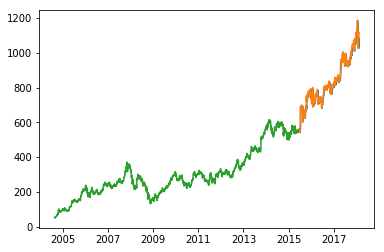

In [227]:
plt.plot(date_for_testing, Y_predict)
plt.plot(date_for_testing, Y_test)
plt.plot(date_for_training, Y_train)
# plt.plot(date, df['Adj. Open'])
plt.show()

In [228]:
label

0         52.637487
1         54.217364
2         52.802998
3         51.318415
4         51.509003
5         49.698414
6         50.631294
7         50.661387
8         50.525969
9         51.408694
10        50.892099
11        53.480088
12        53.886342
13        55.451172
14        56.343928
15        57.387149
16        58.656066
17        60.286097
18        58.906840
19        59.603992
20        60.672290
21        59.965107
22        60.762568
23        63.460898
24        65.150614
25        65.602509
26        67.846937
27        67.538485
28        69.048145
29        68.491426
           ...     
3367    1112.310000
3368    1110.100000
3369    1140.310000
3370    1136.360000
3371    1139.350000
3372    1138.030000
3373    1143.820000
3374    1170.620000
3375    1184.980000
3376    1180.710000
3377    1187.530000
3378    1188.000000
3379    1177.720000
3380    1183.810000
3381    1175.990000
3382    1127.420000
3383    1100.610000
3384    1033.980000
3385    1084.970000


In [229]:
future_X

,Adj. Open,HL_%,%_change,Adj. Volume,label
Date,,,,,
2018-02-16,1093.38,1.535431,0.193894,1971928.0,NaN
2018-02-20,1092.76,2.411927,0.991068,1646405.0,NaN
2018-02-21,1109.10,2.590496,0.419259,2024534.0,NaN
2018-02-22,1119.17,1.837760,-0.828292,1386115.0,NaN
2018-02-23,1118.66,1.854859,0.842973,1234539.0,NaN


In [230]:
del future_X['label']
future_X = future_X.reset_index()
future_dates = future_X['Date']
del future_X['Date']

In [231]:
future_X

,Adj. Open,HL_%,%_change,Adj. Volume
0,1093.38,1.535431,0.193894,1971928.0
1,1092.76,2.411927,0.991068,1646405.0
2,1109.10,2.590496,0.419259,2024534.0
3,1119.17,1.837760,-0.828292,1386115.0
4,1118.66,1.854859,0.842973,1234539.0


In [232]:
future_Y_predict = clf.predict(future_X)

In [233]:
future_Y_predict

array([ 1090.89950288,  1091.7933342 ,  1106.60078664,  1114.01851701,
        1117.45443145])

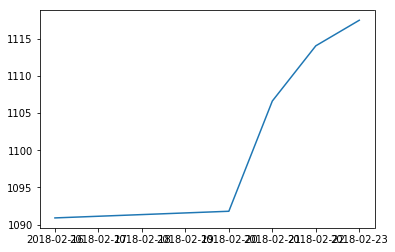

In [234]:
plt.plot(future_dates, future_Y_predict)
plt.show()